<a href="https://colab.research.google.com/github/AN461/Machine_Learning---Early-Warning-Prediction-of-Environmental-Parameters/blob/main/LSTM_for_NO_Forecasting_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
#importing datasets for CO2,co,no,temperatur,humidity
df1 = pd.read_csv("/content/Gas parameters.csv")
df_CO2 = pd.read_csv("/content/january_2024_co2_data (1).csv")
df_CO = pd.read_csv("/content/january_2024_co_data.csv")
df_NO = pd.read_csv("/content/january_2024_no_data.csv")
df_temp = pd.read_csv("/content/january_2024_Temp.csv")
df_humidity = pd.read_csv("/content/january_2024_Humi.csv")

In [ ]:
#Combining the new data into single dataframe
df2 = df_CO2

In [ ]:
df2['CO'] = df_CO['CO']

In [ ]:
df2['NO'] = df_NO['NO']
df2['temp'] = df_temp['Temp']
df2['humi'] = df_humidity['Humi']

In [ ]:
df2

,DateTime,CO2,CO,NO,temp,humi
0,12/31/2023 0:00,544,0,0,29.8,61.4
1,12/31/2023 0:05,546,0,0,29.8,61.4
2,12/31/2023 0:10,549,0,0,29.8,61.4
3,12/31/2023 0:15,546,0,0,29.6,61.4
4,12/31/2023 0:20,548,0,0,29.6,61.4
...,...,...,...,...,...,...
9211,1/31/2024 23:35,550,0,0,29.2,59.9
9212,1/31/2024 23:40,549,0,0,29.2,59.9
9213,1/31/2024 23:45,547,0,0,29.2,59.9
9214,1/31/2024 23:50,549,0,0,29.2,59.9


In [ ]:
#converting the datetime column in the old data to original datetime format using pandas function to_datetime
df1['Datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])
df1.drop(['Date', 'Time'], axis=1, inplace=True)
df1.insert(0, 'Datetime', df1.pop('Datetime'))
print(df1)

                Datetime  CO2  CO  NO  Temp  Humi
0    2023-12-23 23:56:00  563   0   0  29.8  59.8
1    2023-12-23 23:51:00  556   0   0  29.8  59.7
2    2023-12-23 23:56:00  553   0   0  29.8  59.7
3    2023-12-23 23:51:00  558   0   0  29.8  59.7
4    2023-12-23 23:45:00  561   0   0  29.9  59.7
...                  ...  ...  ..  ..   ...   ...
2187 2023-12-30 00:20:00  552   0   0  28.9  60.5
2188 2023-12-30 00:16:00  549   0   0  29.0  60.5
2189 2023-12-30 00:10:00  547   0   0  29.0  60.5
2190 2023-12-30 00:05:00  543   0   0  29.0  60.5
2191 2023-12-30 00:01:00  542   0   0  29.0  60.5

[2192 rows x 6 columns]


In [ ]:
print(df2)

             DateTime  CO2  CO  NO  temp  humi
0     12/31/2023 0:00  544   0   0  29.8  61.4
1     12/31/2023 0:05  546   0   0  29.8  61.4
2     12/31/2023 0:10  549   0   0  29.8  61.4
3     12/31/2023 0:15  546   0   0  29.6  61.4
4     12/31/2023 0:20  548   0   0  29.6  61.4
...               ...  ...  ..  ..   ...   ...
9211  1/31/2024 23:35  550   0   0  29.2  59.9
9212  1/31/2024 23:40  549   0   0  29.2  59.9
9213  1/31/2024 23:45  547   0   0  29.2  59.9
9214  1/31/2024 23:50  549   0   0  29.2  59.9
9215  1/31/2024 23:55  556   0   0  29.2  59.9

[9216 rows x 6 columns]


In [ ]:
#converting the datetime column in the combined new data to original datetime format using pandas function to_datetime
#by creating new Datetime column and droping the existing datetime column
df2['Datetime'] = pd.to_datetime(df2['DateTime'])

In [ ]:
df2.drop(['DateTime'], axis=1, inplace=True)
df2.insert(0, 'Datetime', df2.pop('Datetime'))
print(df2)

                Datetime  CO2  CO  NO  temp  humi
0    2023-12-31 00:00:00  544   0   0  29.8  61.4
1    2023-12-31 00:05:00  546   0   0  29.8  61.4
2    2023-12-31 00:10:00  549   0   0  29.8  61.4
3    2023-12-31 00:15:00  546   0   0  29.6  61.4
4    2023-12-31 00:20:00  548   0   0  29.6  61.4
...                  ...  ...  ..  ..   ...   ...
9211 2024-01-31 23:35:00  550   0   0  29.2  59.9
9212 2024-01-31 23:40:00  549   0   0  29.2  59.9
9213 2024-01-31 23:45:00  547   0   0  29.2  59.9
9214 2024-01-31 23:50:00  549   0   0  29.2  59.9
9215 2024-01-31 23:55:00  556   0   0  29.2  59.9

[9216 rows x 6 columns]


In [ ]:
#renaming the certain columns in combined dataframe for combining with the old dataset
df2.rename(columns={'temp': 'Temp'}, inplace=True)
df2.rename(columns={'humi': 'Humi'}, inplace=True)

In [ ]:
import pandas as pd


# Concatenate the all columns along the columns axis (axis=1) vertically
df = pd.concat([df1, df2], axis=0)

# Display the concatenated DataFrame
print(df)


                Datetime  CO2  CO  NO  Temp  Humi
0    2023-12-23 23:56:00  563   0   0  29.8  59.8
1    2023-12-23 23:51:00  556   0   0  29.8  59.7
2    2023-12-23 23:56:00  553   0   0  29.8  59.7
3    2023-12-23 23:51:00  558   0   0  29.8  59.7
4    2023-12-23 23:45:00  561   0   0  29.9  59.7
...                  ...  ...  ..  ..   ...   ...
9211 2024-01-31 23:35:00  550   0   0  29.2  59.9
9212 2024-01-31 23:40:00  549   0   0  29.2  59.9
9213 2024-01-31 23:45:00  547   0   0  29.2  59.9
9214 2024-01-31 23:50:00  549   0   0  29.2  59.9
9215 2024-01-31 23:55:00  556   0   0  29.2  59.9

[11408 rows x 6 columns]


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with a datetime column named 'datetime_column'

# Sort the DataFrame based on the datetime column
df_sorted = df.sort_values(by='Datetime')

# Remove duplicates based on the datetime column
df = df_sorted.drop_duplicates(subset='Datetime')

# Display the DataFrame with sorted and duplicate-free datetime column
print(df)


                Datetime  CO2  CO  NO  Temp  Humi
273  2023-12-23 00:01:00  560   0   0  29.7  59.8
272  2023-12-23 00:05:00  561   0   0  29.7  59.8
271  2023-12-23 00:10:00  565   0   0  29.7  59.8
270  2023-12-23 00:16:00  567   0   0  29.7  59.8
269  2023-12-23 00:20:00  570   0   0  29.6  59.8
...                  ...  ...  ..  ..   ...   ...
9211 2024-01-31 23:35:00  550   0   0  29.2  59.9
9212 2024-01-31 23:40:00  549   0   0  29.2  59.9
9213 2024-01-31 23:45:00  547   0   0  29.2  59.9
9214 2024-01-31 23:50:00  549   0   0  29.2  59.9
9215 2024-01-31 23:55:00  556   0   0  29.2  59.9

[11376 rows x 6 columns]


In [ ]:
#formatting the index to datatime of our original dataframe
df.index = pd.to_datetime(df['Datetime'], format='%d.%m.%Y %H:%M:%S')

In [ ]:
df

,Datetime,CO2,CO,NO,Temp,Humi
Datetime,,,,,,
2023-12-23 00:01:00,2023-12-23 00:01:00,560,0,0,29.7,59.8
2023-12-23 00:05:00,2023-12-23 00:05:00,561,0,0,29.7,59.8
2023-12-23 00:10:00,2023-12-23 00:10:00,565,0,0,29.7,59.8
2023-12-23 00:16:00,2023-12-23 00:16:00,567,0,0,29.7,59.8
2023-12-23 00:20:00,2023-12-23 00:20:00,570,0,0,29.6,59.8
...,...,...,...,...,...,...
2024-01-31 23:35:00,2024-01-31 23:35:00,550,0,0,29.2,59.9
2024-01-31 23:40:00,2024-01-31 23:40:00,549,0,0,29.2,59.9
2024-01-31 23:45:00,2024-01-31 23:45:00,547,0,0,29.2,59.9


In [ ]:
row = df.iloc[9000]

# Print the row
print(row)

Datetime    2024-01-23 18:00:00
CO2                         601
CO                            0
NO                            0
Temp                       30.0
Humi                       60.3
Name: 2024-01-23 18:00:00, dtype: object


<Axes: xlabel='Datetime'>

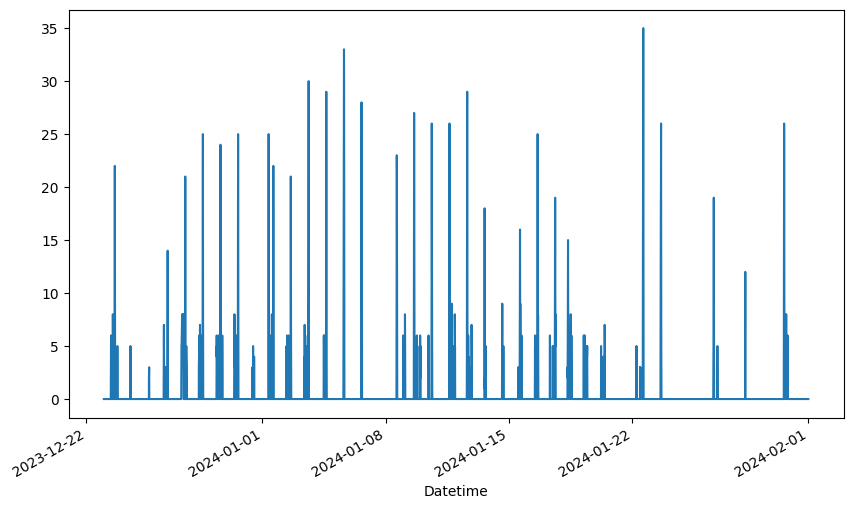

In [ ]:
#searating CO data from the dataframe for CO2 time series forecasting into a temporary dataframe named temp
temp = df['NO']
temp.plot(figsize=(10, 6))

In [ ]:
#function to append data to X1,y1 for training LSTM
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((11371, 5, 1), (11371,))

In [ ]:
#dividing the dataframe into training,validation,testing
X_train1, y_train1 = X1[:5000], y1[:5000]
X_val1, y_val1 = X1[5000:9000], y1[5000:9000]
X_test1, y_test1 = X1[9000:], y1[9000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((5000, 5, 1), (5000,), (4000, 5, 1), (4000,), (2371, 5, 1), (2371,))

In [ ]:

#importing keras from tensorflow for using LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

modelJANCombinedNO = Sequential()
modelJANCombinedNO.add(InputLayer((5, 1)))
modelJANCombinedNO.add(LSTM(64))
modelJANCombinedNO.add(Dense(8, 'relu'))
modelJANCombinedNO.add(Dense(1, 'linear'))

modelJANCombinedNO.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#adding checkpoint to save the best model while training phase
cp1 = ModelCheckpoint('modelJANCombinedNO/', save_best_only=True)
modelJANCombinedNO.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=['mae', 'mape', RootMeanSquaredError()])

In [ ]:
modelJANCombinedNO.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=500, callbacks=[cp1])

Epoch 1/500
157/157 [==============================] - 8s 38ms/step - loss: 8.1020 - mae: 0.6732 - mape: 64431108.0000 - root_mean_squared_error: 2.8464 - val_loss: 5.9239 - val_mae: 0.5895 - val_mape: 112338400.0000 - val_root_mean_squared_error: 2.4339
Epoch 2/500
157/157 [==============================] - 5s 31ms/step - loss: 7.0530 - mae: 0.7101 - mape: 166182096.0000 - root_mean_squared_error: 2.6557 - val_loss: 5.1029 - val_mae: 0.6176 - val_mape: 194504672.0000 - val_root_mean_squared_error: 2.2590
Epoch 3/500
157/157 [==============================] - 5s 32ms/step - loss: 6.0392 - mae: 0.7085 - mape: 229401552.0000 - root_mean_squared_error: 2.4575 - val_loss: 4.3293 - val_mae: 0.5713 - val_mape: 191679232.0000 - val_root_mean_squared_error: 2.0807
Epoch 4/500
157/157 [==============================] - 5s 30ms/step - loss: 4.9639 - mae: 0.6018 - mape: 168597520.0000 - root_mean_squared_error: 2.2280 - val_loss: 3.4458 - val_mae: 0.4657 - val_mape: 124664672.0000 - val_root_mean

In [ ]:
# Assuming model is your trained model
modelJANCombinedNO.save('/content/drive/My Drive/my_modell.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#loading model
from tensorflow.keras.models import load_model
modelJANCombinedNO = load_model('modelJANCombinedNO/')


In [ ]:
train_predictions = modelJANCombinedNO.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

157/157 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,0.055018,0
1,0.055018,0
2,0.055018,0
3,0.055018,0
4,0.055018,0
...,...,...
4995,0.055018,0
4996,0.055018,0
4997,0.055018,0
4998,0.055019,0


In [ ]:
import pandas as pd

# Assuming train_predictions is a NumPy array containing CO2 predictions
# Assuming df is a DataFrame with a datetime index

# Slice df to match the length of train_predictions
df_sliced = df.iloc[:len(train_predictions)]

# Convert train_predictions to a DataFrame
train_predictions_df = pd.DataFrame(train_predictions, index=df_sliced.index, columns=['predictions'])


In [ ]:
train_predictions_df

,predictions
Datetime,
2023-12-23 00:01:00,0.055018
2023-12-23 00:05:00,0.055018
2023-12-23 00:10:00,0.055018
2023-12-23 00:16:00,0.055018
2023-12-23 00:20:00,0.055018
...,...
2024-01-09 20:15:00,0.055018
2024-01-09 20:20:00,0.055018
2024-01-09 20:25:00,0.055018


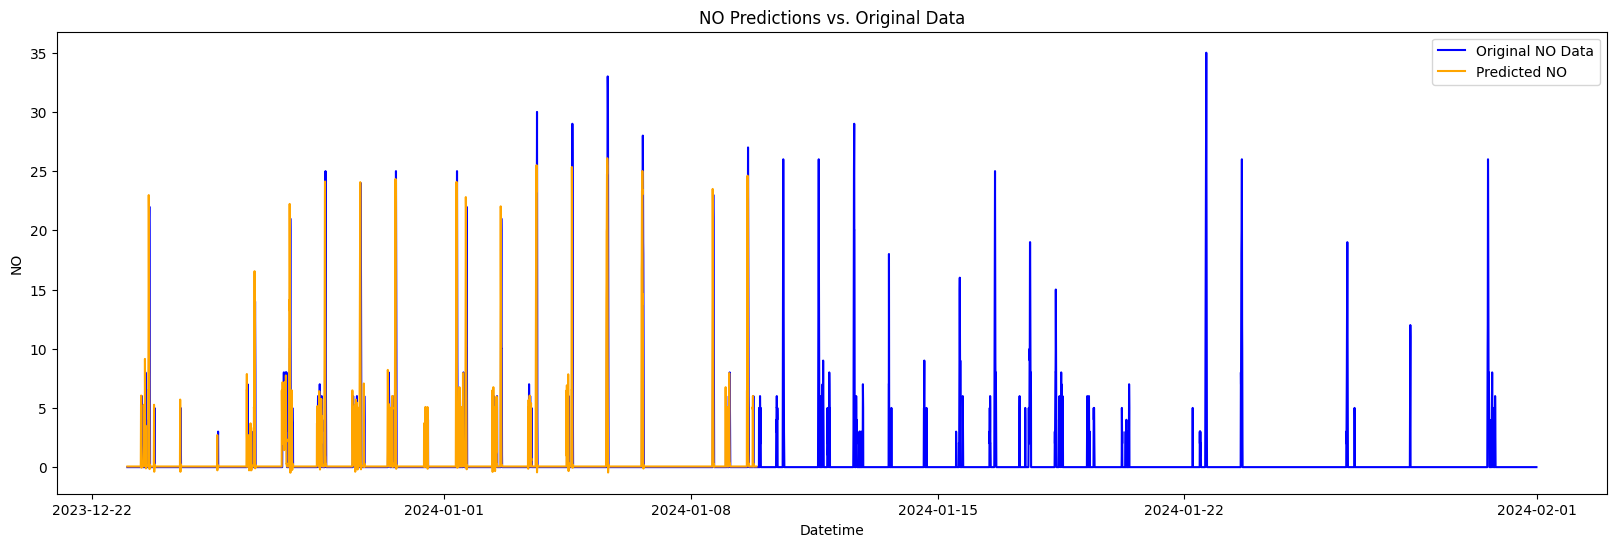

In [ ]:
import matplotlib.pyplot as plt

# Assuming df contains the original CO2 data with datetime index
# Assuming train_predictions_df contains the predicted CO2 values with datetime index

# Plot original data and predictions
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['NO'], label='Original NO Data',color='blue')
plt.plot(train_predictions_df.index, train_predictions_df['predictions'], label='Predicted NO', linestyle='-', color='orange')
plt.xlabel('Datetime')
plt.ylabel('NO')
plt.title('NO Predictions vs. Original Data')
plt.legend()
plt.show()

In [ ]:
Val_predictions = modelJANCombinedNO.predict(X_val1).flatten()

125/125 [==============================] - 0s 2ms/step


In [ ]:
import pandas as pd

# Assuming test_predictions is a list or numpy array containing the predictions
# Assuming df is your defined DataFrame with a datetime index
# Assuming start_date and end_date are the desired start and end points

# Cut the index from the dataset from the starting point to the end point
cut_index = df.index[(df.index >= '2024-01-09 20:45:00') & (df.index <= '2024-01-23 18:00:00')]

# Get the corresponding test predictions for the cut index
Val_predictions_cut = Val_predictions[:len(cut_index)]

# Create a new DataFrame with the cut index as the index for test predictions
Val_predictions_df = pd.DataFrame(Val_predictions_cut, index=cut_index, columns=['predictions'])

# Display the DataFrame with the cut index as the index for test predictions
print(Val_predictions_df)


                     predictions
Datetime                        
2024-01-09 20:45:00     0.055018
2024-01-09 20:50:00     0.055018
2024-01-09 20:55:00     0.055018
2024-01-09 21:00:00     0.055018
2024-01-09 21:05:00     0.055018
...                          ...
2024-01-23 17:40:00     0.055018
2024-01-23 17:45:00     0.055018
2024-01-23 17:50:00     0.055018
2024-01-23 17:55:00     0.055019
2024-01-23 18:00:00     0.055019

[4000 rows x 1 columns]


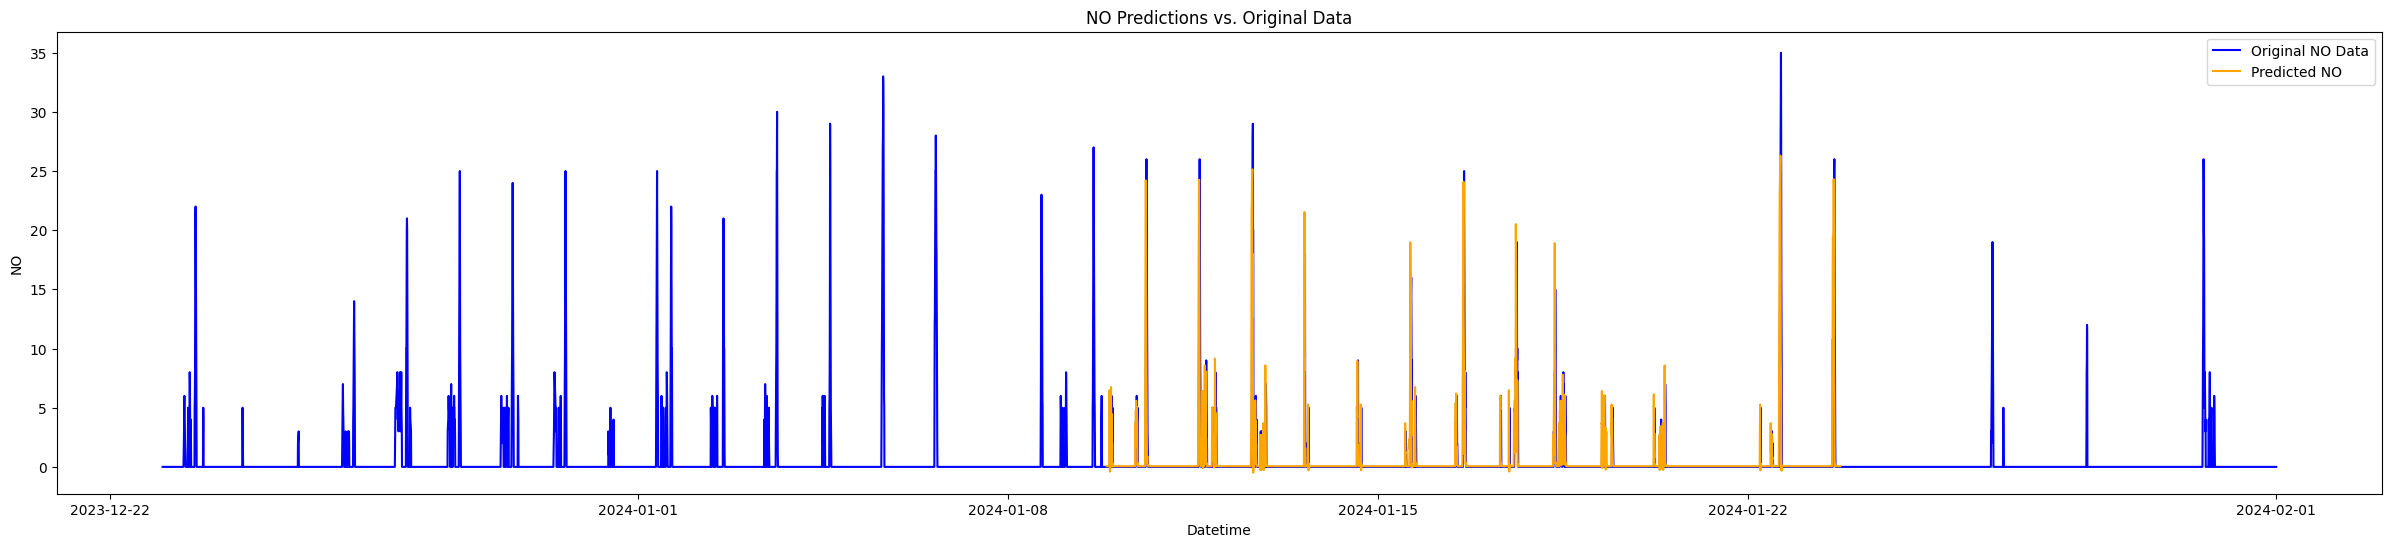

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['NO'], label='Original NO Data',color='blue')
plt.plot(Val_predictions_df.index, Val_predictions_df['predictions'], label='Predicted NO', linestyle='-', color='orange')
plt.xlabel('Datetime')
plt.ylabel('NO')
plt.title('NO Predictions vs. Original Data')
plt.legend()
plt.show()

In [ ]:
test_predictions = modelJANCombinedNO.predict(X_test1).flatten()

75/75 [==============================] - 0s 2ms/step


In [ ]:
df.tail(10)

,Datetime,CO2,CO,NO,Temp,Humi
Datetime,,,,,,
2024-01-31 23:10:00,2024-01-31 23:10:00,553,0,0,29.1,59.7
2024-01-31 23:15:00,2024-01-31 23:15:00,552,0,0,29.1,59.7
2024-01-31 23:20:00,2024-01-31 23:20:00,550,0,0,29.2,59.9
2024-01-31 23:25:00,2024-01-31 23:25:00,557,0,0,29.2,59.9
2024-01-31 23:30:00,2024-01-31 23:30:00,554,0,0,29.2,59.9
2024-01-31 23:35:00,2024-01-31 23:35:00,550,0,0,29.2,59.9
2024-01-31 23:40:00,2024-01-31 23:40:00,549,0,0,29.2,59.9
2024-01-31 23:45:00,2024-01-31 23:45:00,547,0,0,29.2,59.9
2024-01-31 23:50:00,2024-01-31 23:50:00,549,0,0,29.2,59.9


In [ ]:
cutt_index = df.index[(df.index > '2024-01-23 18:00:00') & (df.index <= '2024-01-31 23:25:00')]

# Get the corresponding test predictions for the cut index
test_predictions_cut = test_predictions[:len(cutt_index)]

# Create a new DataFrame with the cut index as the index for test predictions
test_predictions_df = pd.DataFrame(test_predictions_cut, index=cutt_index, columns=['predictions'])

# Display the DataFrame with the cut index as the index for test predictions
print(test_predictions_df)

                     predictions
Datetime                        
2024-01-23 18:05:00     0.055018
2024-01-23 18:10:00     0.055018
2024-01-23 18:15:00     0.055018
2024-01-23 18:20:00     0.055018
2024-01-23 18:25:00     0.055018
...                          ...
2024-01-31 23:05:00     0.055018
2024-01-31 23:10:00     0.055018
2024-01-31 23:15:00     0.055019
2024-01-31 23:20:00     0.055019
2024-01-31 23:25:00     0.055019

[2369 rows x 1 columns]


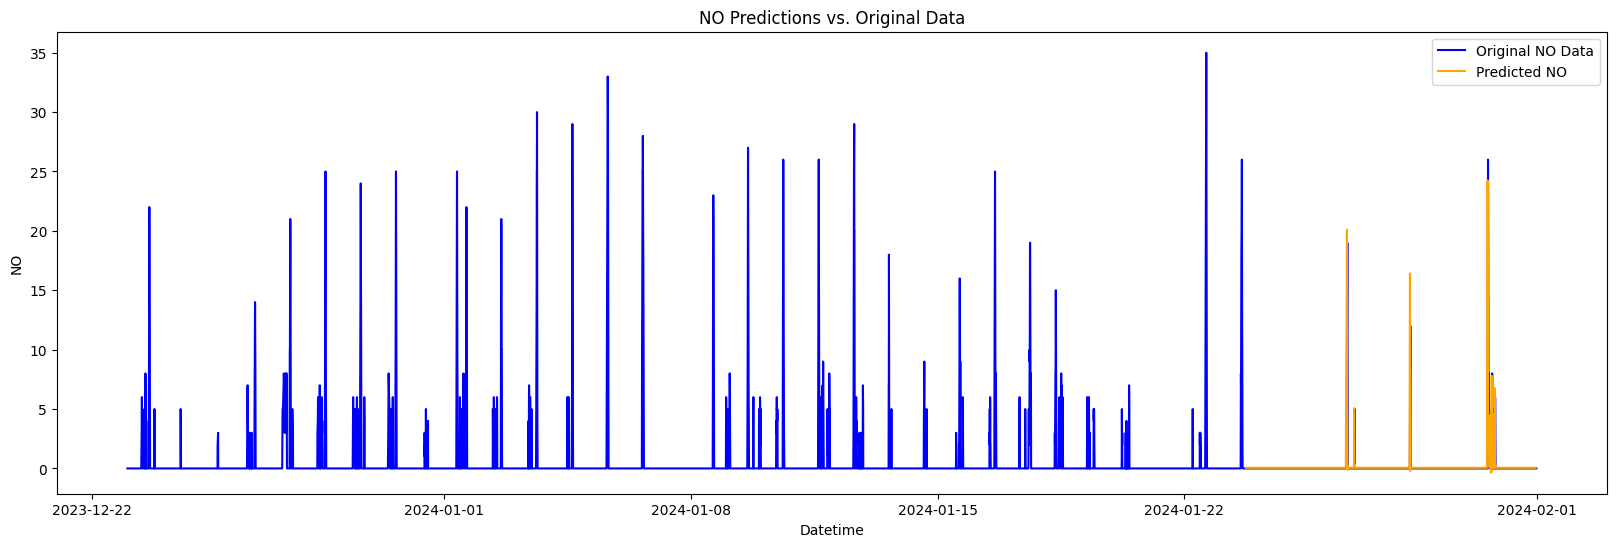

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['NO'], label='Original NO Data',color='blue')
plt.plot(test_predictions_df.index, test_predictions_df['predictions'], label='Predicted NO', linestyle='-', color='orange')
plt.xlabel('Datetime')
plt.ylabel('NO')
plt.title('NO Predictions vs. Original Data')
plt.legend()
plt.show()

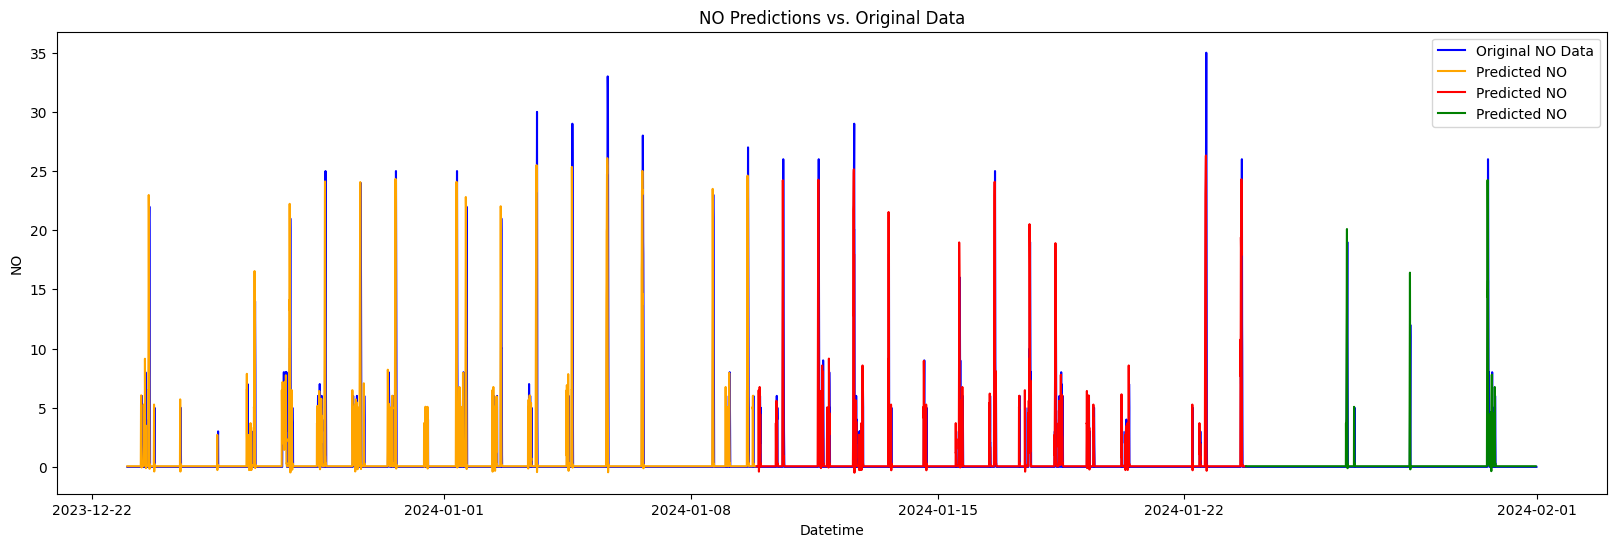

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['NO'], label='Original NO Data',color='blue')
plt.plot(train_predictions_df.index, train_predictions_df['predictions'], label='Predicted NO', linestyle='-', color='orange')
plt.plot(Val_predictions_df.index, Val_predictions_df['predictions'], label='Predicted NO', linestyle='-', color='red')
plt.plot(test_predictions_df.index, test_predictions_df['predictions'], label='Predicted NO', linestyle='-', color='green')
plt.xlabel('Datetime')
plt.ylabel('NO')
plt.title('NO Predictions vs. Original Data')
plt.legend()
plt.show()

In [ ]:
df.tail()

,Datetime,CO2,CO,NO,Temp,Humi
Datetime,,,,,,
2024-01-31 23:35:00,2024-01-31 23:35:00,550,0,0,29.2,59.9
2024-01-31 23:40:00,2024-01-31 23:40:00,549,0,0,29.2,59.9
2024-01-31 23:45:00,2024-01-31 23:45:00,547,0,0,29.2,59.9
2024-01-31 23:50:00,2024-01-31 23:50:00,549,0,0,29.2,59.9
2024-01-31 23:55:00,2024-01-31 23:55:00,556,0,0,29.2,59.9


In [ ]:
n_future = 481

In [ ]:
train_dates = df['Datetime']

In [ ]:
start_datetime = '2024-02-01 00:00:00'
end_datetime = '2024-02-03 00:00:00'

In [ ]:
f_p_dates = pd.date_range(start=start_datetime, end=end_datetime, freq='6T')


In [ ]:
f_p_dates.shape

(481,)

In [ ]:
forecast = modelJANCombinedNO.predict(X_train1[-n_future:])

16/16 [==============================] - 0s 3ms/step


In [ ]:
forecast_dates = []
for time_i in f_p_dates:
   forecast_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame({'Datetime':np.array(forecast_dates), 'Open':forecast[:,0]})
df_forecast['Datetime'] = pd.to_datetime(df_forecast['Datetime'])

In [ ]:
df_forecast.index = f_p_dates

In [ ]:
df_forecast

,Datetime,Open
2024-02-01 00:00:00,2024-02-01,0.055018
2024-02-01 00:06:00,2024-02-01,0.055018
2024-02-01 00:12:00,2024-02-01,0.055018
2024-02-01 00:18:00,2024-02-01,0.055018
2024-02-01 00:24:00,2024-02-01,0.055018
...,...,...
2024-02-02 23:36:00,2024-02-02,0.055018
2024-02-02 23:42:00,2024-02-02,0.055018
2024-02-02 23:48:00,2024-02-02,0.055019
2024-02-02 23:54:00,2024-02-02,0.055019


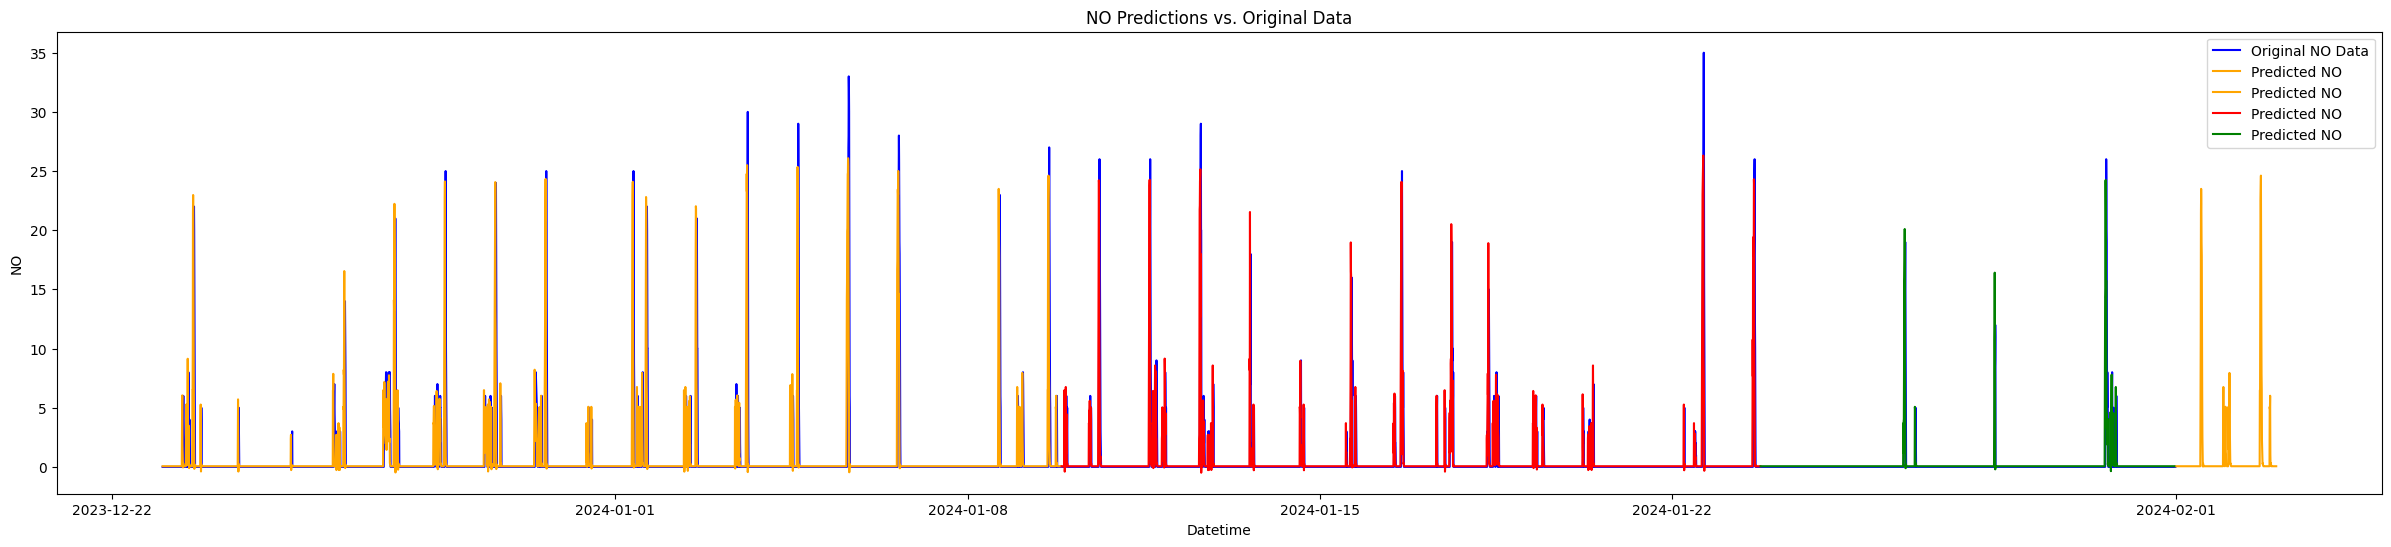

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['NO'], label='Original NO Data',color='blue')
plt.plot(df_forecast.index, df_forecast['Open'], label='Predicted NO', linestyle='-', color='orange')
plt.plot(train_predictions_df.index, train_predictions_df['predictions'], label='Predicted NO', linestyle='-', color='orange')
plt.plot(Val_predictions_df.index, Val_predictions_df['predictions'], label='Predicted NO', linestyle='-', color='red')
plt.plot(test_predictions_df.index, test_predictions_df['predictions'], label='Predicted NO', linestyle='-', color='green')
plt.xlabel('Datetime')
plt.ylabel('NO')
plt.title('NO Predictions vs. Original Data')
plt.legend()
plt.show()